/Users/pratyusatripathy/opt/anaconda3/envs/tradingInterface/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


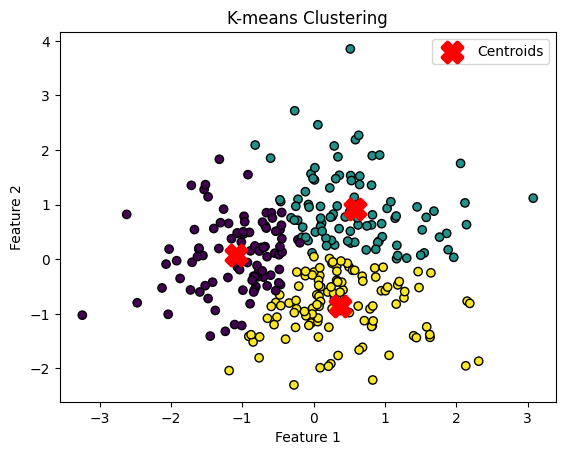

In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Generate some example data
np.random.seed(42)
data = np.random.randn(300, 2)  # 300 data points with 2 features

# Choose the number of clusters (k)
k = 3

# Create a KMeans instance
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(data)

# Get the cluster labels and centroids
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Visualize the results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', s=200, linewidths=3, color='red', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

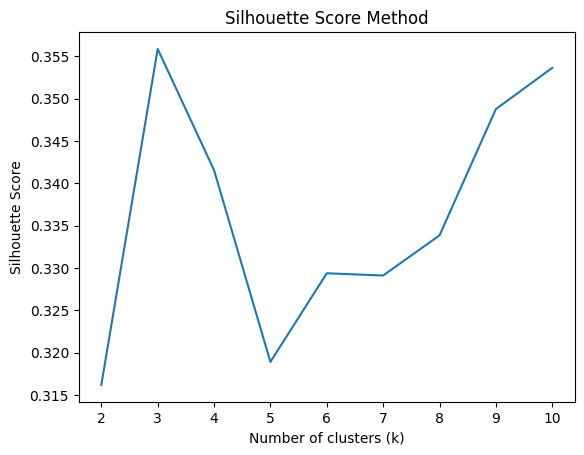

In [2]:


silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(data)
    silhouette_scores.append(silhouette_score(data, kmeans.labels_))

plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.show()

/Users/pratyusatripathy/opt/anaconda3/envs/tradingInterface/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Clustering Accuracy: 30.00%


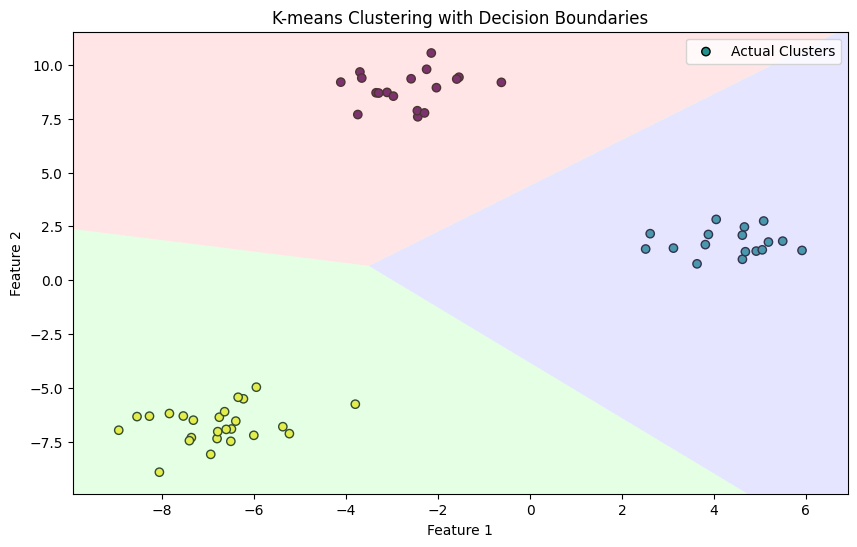

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

# Generate synthetic data with three clusters
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=1.0)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a K-means clustering model
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train)

# Predict cluster labels for the test set
y_pred = kmeans.predict(X_test)

# Evaluate the accuracy of the clustering (for comparison purposes)
accuracy = accuracy_score(y_test, y_pred)
print(f"Clustering Accuracy: {accuracy*100:.2f}%")

# Plot the clustered boundaries
plt.figure(figsize=(10, 6))

# Plot actual data points
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='viridis', edgecolors='k', marker='o', label='Actual Clusters')

# Plot clustered boundaries
h = 0.02  # step size for the meshgrid
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
cmap_background = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3, levels=np.arange(4)-0.5, antialiased=True)

plt.title('K-means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()
